In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'brainmentors'
os.environ['KAGGLE_KEY'] = '2eb1fd9ccb773c55a753dd583fbf838c'

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip chest-xray-pneumonia.zip

In [ ]:
# len(os.listdir('chest_xray/train/NORMAL/'))
len(os.listdir('chest_xray/chest_xray/train/NORMAL/'))

1342

In [ ]:
len(os.listdir('chest_xray/train/PNEUMONIA/'))

3875

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_path = 'chest_xray/chest_xray/train/'
test_path = 'chest_xray/chest_xray/test/'

In [ ]:
def load_data(path):
  features = []
  targets = []
  dirs = os.listdir(path)
  for i, dir in enumerate(dirs):
    if not dir.startswith('.'):
      images = os.listdir(path + '/' + dir)
      for img in images:
        try:
          img_path = path+"/"+dir+"/"+img
          img_obj = cv2.imread(img_path)
          img_obj = cv2.resize(img_obj, (299,299))
          features.append(img_obj)
          targets.append(i)
        except BaseException as ex:
          print(ex)
  return features, targets

In [ ]:
train_images, train_labels = load_data(train_path)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
test_images, test_labels = load_data(test_path)

In [ ]:
len(train_images)

5216

In [ ]:
train_images[0].shape

(299, 299, 3)

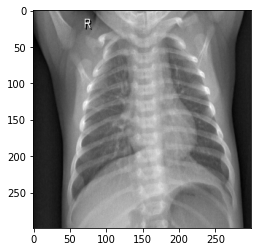

In [ ]:
plt.imshow(train_images[0])

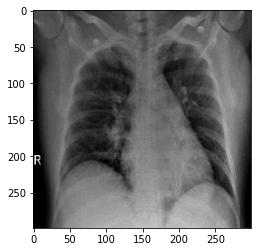

In [ ]:
plt.imshow(train_images[4000])

In [ ]:
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

In [ ]:
train_images.shape

(5216, 299, 299, 3)

In [ ]:
test_images.shape

(624, 299, 299, 3)

In [ ]:
# train_images = train_images / 255.0
# test_images = test_images / 255.0

In [ ]:
np.unique(train_labels, return_counts=True)

(array([0, 2]), array([1341, 3875]))

In [ ]:
train_labels = np.where(train_labels == 2, 1, train_labels)

In [ ]:
np.unique(train_labels, return_counts=True)

(array([0, 1]), array([1341, 3875]))

In [ ]:
test_labels = np.where(test_labels == 2, 1, test_labels)

In [ ]:
from tensorflow.keras.applications import InceptionV3, VGG19, ResNet50, Xception, InceptionResNetV2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
# inception = InceptionV3() # 299x299
# vgg16 = VGG19() # 224x224

pre_model = InceptionResNetV2() # 299x299

225214464/225209952 [==============================] - 6s 0us/step


In [ ]:
output_layer = pre_model.output

In [ ]:
output_layer

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [ ]:
x = pre_model.output
x = Dense(1024, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs = pre_model.input, outputs=output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=2, validation_data = (test_images, test_labels))

Epoch 1/2
163/163 [==============================] - 481s 3s/step - loss: 0.1827 - accuracy: 0.9417 - val_loss: nan - val_accuracy: 0.3702
Epoch 2/2
163/163 [==============================] - 421s 3s/step - loss: 0.0871 - accuracy: 0.9712 - val_loss: nan - val_accuracy: 0.3702
